In [1]:
import datareceiver
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [80]:
a = datareceiver.database()
a.connect()

In [81]:
d = np.array(a.nodes())

In [82]:
result = {}
for item in d:
    # print(item['name'].lower())
    if ('env' not in item['name'].lower()) and ('acc' in item['name'].lower() or 'vel' in item['name'].lower()):
        result[item['name']] = item


In [83]:
print(len(result))
print(result.keys())
print(result['GE_RS_V_ACC'])

47
dict_keys(['GB_HSS_V_ACC', 'GB_HSS_V_VEL', 'GB_HSS_H_ACC', 'GB_HSS_H_VEL', 'GB_HSS_A_ACC', 'GB_HSS_A_VEL', 'GE_RS_V_ACC', 'GE_RS_V_VEL', 'GE_RS_H_ACC', 'GE_RS_H_VEL', 'GE_RS_A_ACC', 'GE_RS_A_VEL', 'GE_GS_V_ACC', 'GE_GS_V_VEL', 'GE_GS_H_ACC', 'GE_GS_H_VEL', 'GE_GS_A_ACC', 'GE_GS_A_VEL', 'GE_R1_V_ACC', 'GB_LOW_A_VEL', 'GB_LOW_V_VEL', 'GE_L1_V_ACC', 'GE_L1_V_VEL', 'GE_L2_V_ACC', 'GE_L2_V_VEL', 'GE_L_LOW_V_ACC', 'GE_L_LOW_V_VEL', 'GE_R_LOW_V_ACC', 'GB_LOW_H_VEL', 'GB_H_Low_LACC', 'GB_H_Low_LVEL', 'GB_V_Low_LACC', 'GB_V_Low_LVEL', 'GB_A_Low_LACC', 'GB_A_Low_LVEL', 'GB_H_Low_LACC_10Hz', 'GB_V_Low_LACC_10Hz', 'GB_A_Low_LACC_10Hz', 'MB_V_VEL', 'MB_H_VEL', 'MB_A_VEL', 'MB_H_ACC_500Hz', 'MB_V_ACC_10Hz', 'MB_A_ACC_10Hz', 'MB_H_VEL_200Hz', 'MB_H_ACC_10Hz', 'MB_V_VEL_200Hz'])
{'node': 15, 'parent': 4, 'treetype': 1, 'nodetype': 10201, 'name': 'GE_RS_V_ACC', 'status': 2177, 'active': 1}


In [84]:
import math

In [130]:
def draw(deviceName, timeIndex, testIdx, spectra, ffts=False):
    searchData = a.search(result[deviceName]['node'])
    timeline = searchData[timeIndex]['time_signal_lines']
    print(searchData[timeIndex])
    raw = a.raw(searchData[timeIndex]['id'])[testIdx]
    # print(deviceName, searchData[timeIndex]['node'], searchData[timeIndex]['date'])
    # print(searchData[timeIndex])
    # print(raw)
    # print()

    # print(np.max(raw['rawdata'] * raw['scale_factor'] / 10))
    # print(np.max(np.abs(raw['rawdata']) * raw['scale_factor'] / 10))


    plt.figure(figsize=(24,3))
    # plt.subplot(2, 1, 1)

    # inner = np.arange(0, timeline) * 8
    # outter = (np.arange(0, timeline * timeline) / timeline).astype('int')
    # print(inner)

    raw_scale = []
    factor = raw['scale_factor']
    for item in raw['rawdata']:
        data = item * factor 

    # print(timeline)
    # print(len(raw['rawdata']))
    # print((raw['rawdata'] * raw['scale_factor']).max())    

    if spectra:
        d = (np.tile(np.arange(timeline), math.ceil(len(raw['rawdata']) / timeline)) + 1)[:len(raw['rawdata'])]
        n6 = 2 * math.pi * searchData[timeIndex]['end_freq'] / (timeline * 1000)
        print(n6)
        print(len(raw['rawdata']))
        print(len(d))
        p = raw['rawdata'] * raw['scale_factor'] / math.sqrt(2) / (n6 * d) / 25.4 * 10
        print(p.max())                                               
        plt.plot(np.arange(len(raw['rawdata'])) / len(raw['rawdata']) * searchData[timeIndex]['end_freq'], p)
        plt.xticks(np.arange(0, 1000, step=25))
        plt.show()

    elif ffts:
        N = int(searchData[timeIndex]['sample_rate'])
        T = 1.0 / len(raw['rawdata'])

        N = int(searchData[timeIndex]['sample_rate']) 
        T = 1.0 / (searchData[timeIndex]['end_freq'] * 2)
        r = (raw['rawdata'] * raw['scale_factor']).astype('float32') * (math.sqrt(2)) 
        y = r
        yf = fft(y)
        xf = fftfreq(N, T)[:N//2]

        plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]) )

        print(raw['rawdata'] * raw['scale_factor'])
        plt.show()
    
    else:
        plt.plot(np.arange(len(raw['rawdata'])) / searchData[timeIndex]['sample_rate'], raw['rawdata'] * raw['scale_factor'])
        plt.show()


{'id': 778210, 'node': 82, 'date': datetime.datetime(2022, 8, 30, 6, 0, 30, 370000), 'value': 0.02397741749882698, 'start_freq': 0.0, 'end_freq': 1000.0, 'sample_rate': 2560.0, 'speed': 0.0, 'speed_min': 0.0, 'speed_max': 0.0, 'speed_begin': 0.0, 'speed_end': 0.0, 'time_signal_lines': 4096, 'SpectraScaling': 1, 'SpectraEUType': 2}
0.0015339807878856412
1600
1600
0.018178730232508534


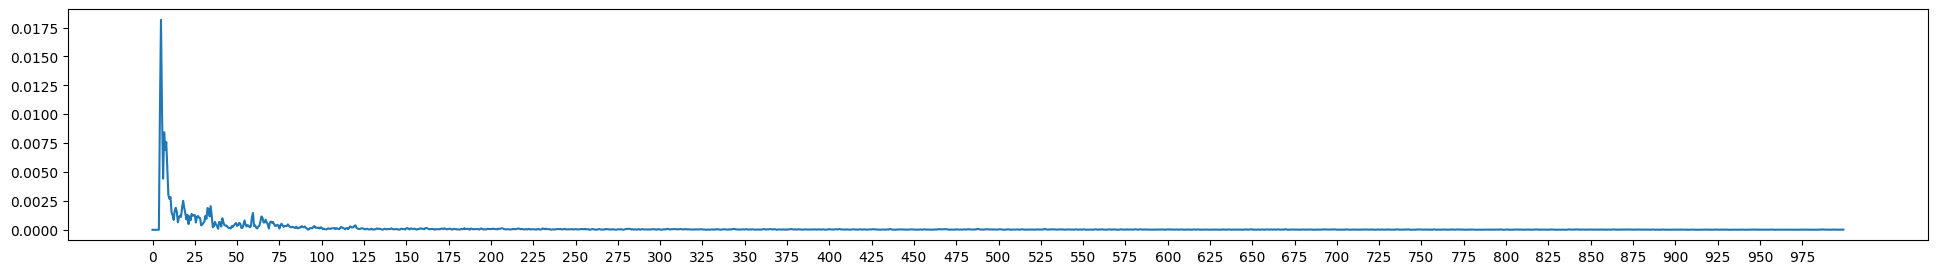

{'id': 778210, 'node': 82, 'date': datetime.datetime(2022, 8, 30, 6, 0, 30, 370000), 'value': 0.02397741749882698, 'start_freq': 0.0, 'end_freq': 1000.0, 'sample_rate': 2560.0, 'speed': 0.0, 'speed_min': 0.0, 'speed_max': 0.0, 'speed_begin': 0.0, 'speed_end': 0.0, 'time_signal_lines': 4096, 'SpectraScaling': 1, 'SpectraEUType': 2}


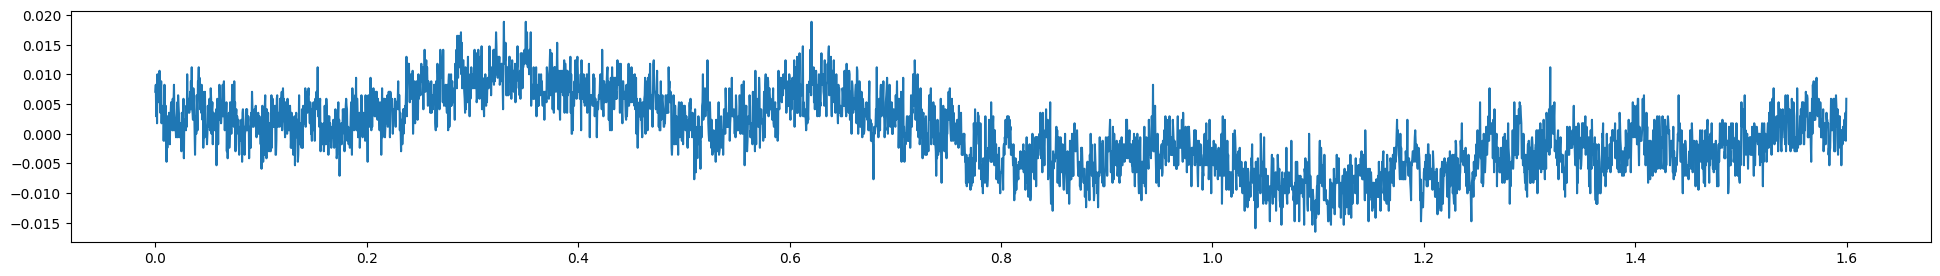

{'id': 778210, 'node': 82, 'date': datetime.datetime(2022, 8, 30, 6, 0, 30, 370000), 'value': 0.02397741749882698, 'start_freq': 0.0, 'end_freq': 1000.0, 'sample_rate': 2560.0, 'speed': 0.0, 'speed_min': 0.0, 'speed_max': 0.0, 'speed_begin': 0.0, 'speed_end': 0.0, 'time_signal_lines': 4096, 'SpectraScaling': 1, 'SpectraEUType': 2}
[ 0.00708064  0.00826075  0.00295027 ...  0.00354032 -0.00118011
  0.00590053]


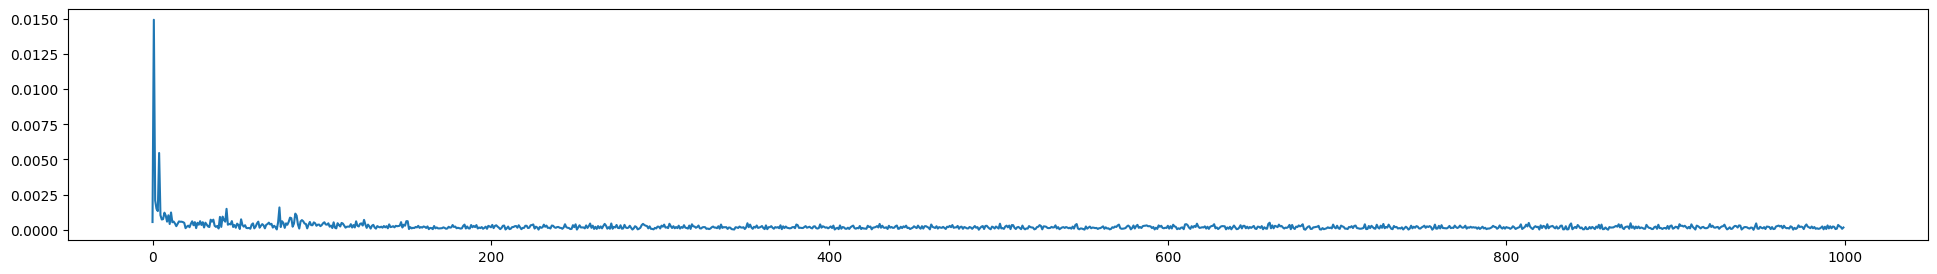

In [131]:
deviceName = 'MB_H_VEL'
timeIndex = 0
draw(deviceName, timeIndex, 0, True)
draw(deviceName, timeIndex, 2, False)
# draw(deviceName, timeIndex, 2, False, True)